# 학습내용

[1] RNN

[2] LTSM / GRU

[3] BiLSTM / Attension

[4] Seq2Seq

[5] Transformer

# LSTM

### LSTM (Long Short-Term Memory) 개요
- RNN은 타입 스텝 t에서 이전 스탭 (t-1)의 상태 (h<sub>t-1</sub>)를 입력으로 받는 구조이므로 이전스탭(t-1)의 정보가 현재 타입 스탭 t에 영향을 줌
- <font color=red>장기의존성 (Long-Term Dependency)</font> : RNN 타입스텝이 길어질수록 영향을 주지 못하는 문제 발생   
  - 입력데이터가 RNN Cell을 지나면서 특정 연산(tanh)에 의해 사라짐 (Vanishing Gradient)
  - 장기간 메모리를 가질 수 있는 셀이 필요 → LSTM, GRU

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/rnn24.png" width=50%>   
</center>   




- 정말 시간이 지나면 모든 기억이 현재에 미치는 영향이 감소하나요 ?
- 모든 기억이 먼 과거의 기억보다 최근의 기억이 현재에 미치는 영향이 큰가요 ?
<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/rnn39.png" width=40%>   
</center>  

- <font color=red>메모리 셀 (Memory Cell)</font> : RNN의 최종 출력은 이전 타입 스탭의 모든 입력에 대한 함수를 의미

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/rnn25.png" width=35%>   
</center>

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/rnn26.png" width=50%>   
</center>

- 1997년에 등장하였으며 오차의 기울기가 1000단계가 넘는 시간을 거슬러 올라갈 수 있도록 함.
- 정보를 추가하거나 삭제하는 기능을 담당하는 Cell State라고 불리는 특징층을 하나 더 넣어 weight를 계속 기억할 것인지 결정 → Vanishing Gradient의 문제를 해결
- LSTM은 3개의 gates(input, forget, output)로 현재 노드의 상태 정보를 제어
  - <font color=red>Forget gate</font> : 이전 상태 정보를 저장할지를 결정
  - <font color=red>Input gate</font> : 입력되는 새로운 정보를 저장할지 결정
  - <font color=red>Output gate</font> : 갱신된 cell의 출력값을 제어 → 0~1 사이 값을 가짐 (Sigmoid)




- h는 단기 상태 (Short-Term state)를 c는 장기 상태(Long-Term state)라고 볼 수 있음
- 장기 기억 C<sub>t-1</sub>은 왼쪽에서 오른쪽으로 통과하면서 Forget gate를 지나면서 일부 정보를 잃고(sigmoid가 곱해지므로) 덧셈 연산으로 Input gate로부터 덧셈 (+) 연산을 통해 새로운 정보를 추가
- 연산을 통해 만들어진 C<sub>t</sub>는 바로 출력되고 C<sub>t</sub>는 타입 스탭마다 일부 기억을 삭제하고 추가하는 과정을 거침
- 덧셈 연산 후에 C<sub>t</sub>는 Output gate의 tanh 함수로 전달되어 단기 상태 h<sub>t</sub>와 셀 출력 y<sub>t</sub>를 만듬

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/rnn27.png" width=50%>   
</center>   

- <font color=red>Forget gate</font> : 이전 정보를 저장할 것인지 결정 – 시그모이드 함수 사용, 1에 가까울 수록 저장
  - f<sub>t</sub>에 의해 제어되며 장기 상태 C<sub>t</sub>의 어느 부분을 삭제할지 제어  
- <font color=red>Input gate</font> : 입력되는 정보를 저장할 것인지 결정 – 시그모이드 함수 사용, 1에 가까울 수록 저장
  - I<sub>t</sub>에 의해 제어되며(크기성분) g<sub>t</sub>의 어느 부분(방향성분)이 장기 상태 C<sub>t</sub>에 더해져야 되는지 제어  

- <font color=red>Cell state</font> : 정보를 추가하거나 삭제하는 기능을 수행   

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/rnn28.png" width=30%>   
</center>   

- <font color=red>Output gate</font> : 갱신된 정보를 전달할 것인지 결정
  - O<sub>t</sub>는 장기 상태 C<sub>t</sub>의 어느 부분을 읽어서 h<sub>t</sub>와 y<sub>t</sub>를 출력해야 하는지 제어


- 기존 RNN의 경우, 정보와 정보 사이의 거리가 멀면, 초기의 weight값이 유지되지 않아 학습능력이 저하 → LSTM은 과거의 data를 계속해서 update 하므로 RNN보다 지속적
  - 장점 : 각각의 메모리 컨트롤이 가능하다는 점과 결과값이 컨트롤이 가능하다는 점
  - 단점 : 메모리가 덮어씌워질 가능성이 있고, 연산속도가 느리다는 단점

### 월별 항공 승객수 예측
- 데이터 셋
  - 1949년부터 1960년까지의 월별 항공 승객 수 데이터
    - Month : 년/월
    - #Passengers : 승객수

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/강의 자료들/2025/250701 인사교 6기 자연어처리 B반/딥러닝 기초 25.07.11 (class 2)

/content/drive/.shortcut-targets-by-id/1BetU2RLJA7gC3DgSstzRg0db8buEhQBE/딥러닝 기초 25.07.11 (class 2)


- 데이터 로드

In [3]:
import pandas as pd

df = pd.read_csv("./data/AirPassengers.csv")

In [4]:
df.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
# 날짜 타입 변환
df["Month"] = pd.to_datetime(df["Month"])

In [7]:
# 승객수를 실수형으로 형변환
data = df["#Passengers"].values.astype(float)

In [8]:
# 2차원 변환
data = data.reshape(-1, 1)

- 스케일링
    - 원본 승객수는 대략 수십에서 수백 단위로 분포하는데, 이대로 모델에 넣으면 큰 값에 과도하게 반응하거나 작은 값이 무시될 수 있음

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # 기본값 : 0 ~ 1
data_normalized = scaler.fit_transform(data)

In [10]:
data_normalized

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

- 훈련/검증 데이터 분리

In [11]:
# 데이터 길이 기준 분할 (train set : 80%, valid set : 20%)
train_ratio = 0.8

train_size = int(len(data_normalized) * train_ratio)

In [12]:
# 1년치 기준
seq_length = 12

In [13]:
# train set 슬라이싱
train_data = data_normalized[:train_size]

In [14]:
# valid set 슬라이싱
val_data = data_normalized[train_size - seq_length: ]

- 시계열 생성

In [15]:
import numpy as np

In [16]:
def create_sequences(data, seq_length) :

    xs = [] # 입력 시퀀스
    ys = [] # 예측 대상

    for i in range(len(data) - seq_length) :
        # xs (입력시퀀스 생성)
        x = data[ i : i + seq_length ]

        # ys (예측 대상)
        y = data[ i + seq_length ]

        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [17]:
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)

In [18]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

# 103 : 샘플개수
# 12 : 타임스탭(시퀀스 길이)
# 1 : 특성

((103, 12, 1), (103, 1), (29, 12, 1), (29, 1))

- 텐서 변환

In [19]:
import torch

X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
X_val_tensor = torch.tensor(X_val, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32)
y_val_tensor = torch.tensor(y_val, dtype = torch.float32)

X_train_tensor.shape, y_train_tensor.shape, X_val_tensor.shape, y_val_tensor.shape

(torch.Size([103, 12, 1]),
 torch.Size([103, 1]),
 torch.Size([29, 12, 1]),
 torch.Size([29, 1]))

- LSTM 모델 설계

In [20]:
import torch.nn as nn

In [21]:
class LSTM(nn.Module) :
    def __init__(self, input_size = 1, hidden_size = 64, num_layers = 1, output_size = 1) :
        super().__init__()

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first = True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x) :
        out, _ = self.lstm(x)

        # 마지막 시점 출력 사용
        y = self.fc(out[:, -1, :])
        return y

- 손실함수, 최적화 함수 설정

In [22]:
model = LSTM()

In [23]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

- 훈련

In [24]:
n_epochs = 100

for epoch in range(n_epochs) :
    model.train()
    optimizer.zero_grad()

    output = model(X_train_tensor)
    loss = loss_func(output, y_train_tensor)
    loss.backward()
    optimizer.step()

- 검증

In [25]:
model.eval() # 평가모드로 전환

with torch.no_grad() :
    y_pred = model(X_val_tensor)
    val_loss = loss_func(y_pred, y_val_tensor)
    print(val_loss.item())

0.01244362909346819


- 원래 스케일로 변환

In [26]:
pred_actual = scaler.inverse_transform(y_pred.numpy())

In [27]:
y_val_actual = scaler.inverse_transform(y_val_tensor.numpy())

- 월 인덱스 생성

In [28]:
train_size

115

In [29]:
val_dates = df["Month"][train_size:].reset_index(drop = True)

- 시각화

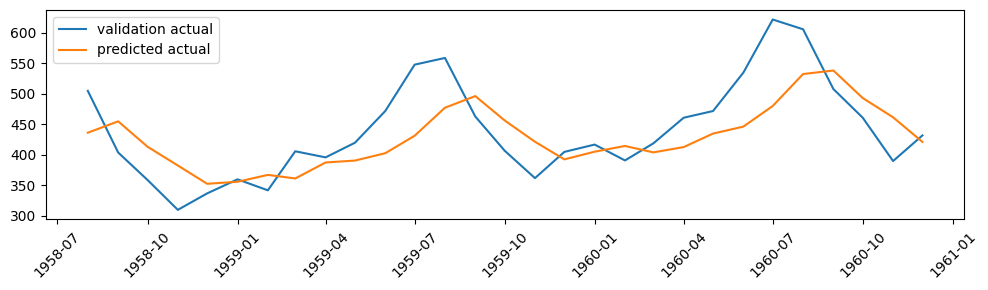

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 3))

plt.plot(val_dates, y_val_actual, label = "validation actual")
plt.plot(val_dates, pred_actual, label = "predicted actual")


plt.xticks(rotation = 45)
plt.legend()

plt.tight_layout()

plt.show()

# GRU

### GRU (Gated Recurrent Units) 개요
- 2014년에 K. Cho(조경현) 등이 LSTM을 간소화 한 버전으로, Gradient Vanishing의 문제를 해결
- LSTM은 초기의 weight가 계속 지속적으로 업데이트되었지만, GRUs는 Cell State를 없애고 Update Gate와 Reset Gate를 추가하여, 과거의 정보를 어떻게 반영할 것인지 결정
- Update Gate는 과거의 상태를 반영하는 Gate (Input gate와 유사한 동작)이며, Reset Gate는 현시점 정보와 과거시점 정보의 반영 비율을 결정
- 장점 : 연산속도가 빠르며, 메모리가 LSTM처럼 덮여 쓰여질 가능성이 없음
- 단점 : 메모리와 결과값의 컨트롤이 불가능


- LSTM의 C<sub>t</sub>와 h<sub>t</sub>가 h<sub>t</sub>로 통합
- 하나의 게이트 제어기인 Z<sub>t</sub>가 0이면 이전(t-1) 정보가 전달되고 1이면 현재 (t) 정보가 전달
- 전체 상태 벡터 h<sub>t</sub>가 타입 스텝마다 출력되며 r<sub>t</sub>는 이전 상태 h<sub>t-1</sub>의 어느 부분이 출력될 지 제어

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/rnn31.png" width=30%>   
</center>

### 6개월 이후까지 예측하기

- 시계열 데이터 생성 (6개월)

In [35]:
def create_multistep_sequences(data, seq_length, predict_length) :
    # predict_length : 예측할 미래 시점 개수 (호출 시 6개월로 지정)

    xs = [] # 입력 시퀀스
    ys = [] # 타겟 시퀀스

    for i in range(len(data) - seq_length - predict_length + 1) :
        # xs (입력시퀀스 생성)
        x = data[ i : i + seq_length ]

        # ys (예측 대상)
        y = data[ i + seq_length : i + seq_length + predict_length ]
        # i + seq_length : 13개월 째 예측 대상
        # i + seq_length + predict_length : 18개월 끝값

        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [37]:
predict_length = 6 # 예측할 미래 시점 기준(개월 수)

X_train, y_train = create_multistep_sequences(train_data, seq_length, predict_length)
X_val, y_val = create_multistep_sequences(val_data, seq_length, predict_length)

In [38]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((98, 12, 1), (98, 6, 1), (24, 12, 1), (24, 6, 1))

- 텐서로 변환

In [39]:
X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
X_val_tensor = torch.tensor(X_val, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32)
y_val_tensor = torch.tensor(y_val, dtype = torch.float32)

X_train_tensor.shape, y_train_tensor.shape, X_val_tensor.shape, y_val_tensor.shape

(torch.Size([98, 12, 1]),
 torch.Size([98, 6, 1]),
 torch.Size([24, 12, 1]),
 torch.Size([24, 6, 1]))

- 모델 설계

### Stacking Recurrent Layer (스태킹 순환 층)
- RNN 계열의 층을 더 깊이 쌓을 수 있음
- Many to Many 방식으로 이전층의 출력값을 다음층의 입력값으로 전달 가능

> TensorFlow 예시

```python
lstm_rnn.add(LSTM(units=1, return_sequence = True))
lstm_rnn.add(LSTM(units=1))
```

In [42]:
class MultiStepGRU(nn.Module) :
    def __init__(self, input_size = 1, hidden_size = 64, num_layers = 3, predict_length = 6) :
        super().__init__() # 초기화

        self.gru = nn.GRU(
            input_size = input_size,
            hidden_size = hidden_size,
            num_layers = num_layers,
            dropout = 0.3, # 매번 epoch 때마다 30%의 가중치들을 off → 다양성을 확보하여 과적합 현상 회피
                           # RNN 계열들은 구조 상 num_layres가 2 이상일 때 드롭아웃 적용 가능
            batch_first = True # [batch, seq_len, feature]
        )

        self.fc = nn.Linear(hidden_size, predict_length)

    def forward(self, x) :
        out, h_n = self.gru(x)
        # out : 매 시점의 hidden_state 값
        # h_n : 최종 hidden_state, shape = [num_layers, batch, hidden_size]

        y = self.fc(h_n[-1]) # [batch, hidden_size]
        return y

In [43]:
# 모델 초기화
model = MultiStepGRU(input_size=1, hidden_size=64, num_layers=3, predict_length=6)

# 손실함수, 최적화 함수 초기화
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

- 훈련

In [45]:
output = model(X_train_tensor)
output.shape

torch.Size([98, 6])

In [46]:
y_train_tensor.shape

torch.Size([98, 6, 1])

In [47]:
n_epochs = 100

for epoch in range(n_epochs) :
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = loss_func(output, y_train_tensor.squeeze(-1)) # 모양맞춰주기
    loss.backward()
    optimizer.step()

- 검증

In [48]:
model.eval() # 평가모드로 전환

with torch.no_grad() :
    y_pred = model(X_val_tensor)
    val_loss = loss_func(y_pred, y_val_tensor.squeeze(-1))
    print(val_loss.item())

0.026854166761040688


- 역정규화

In [49]:
pred_actual = scaler.inverse_transform(y_pred.numpy())

y_val_actual = scaler.inverse_transform(y_val_tensor.squeeze(-1).numpy())

In [50]:
pred_actual.shape, y_val_actual.shape

((24, 6), (24, 6))

- 6달치 예측값에 대한 시각화

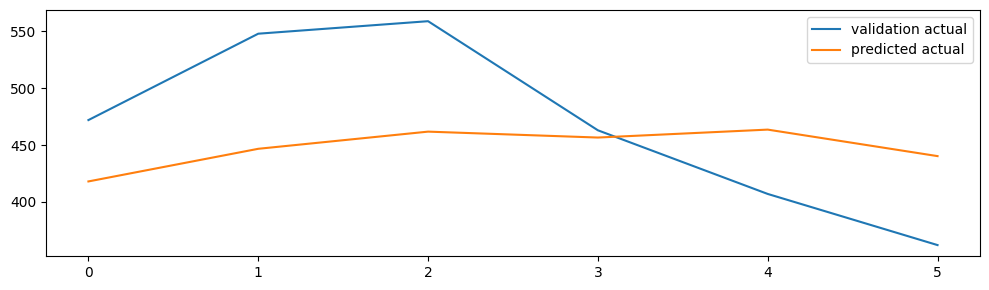

In [59]:
plt.figure(figsize = (10, 3))

idx = 10

plt.plot(range(predict_length), y_val_actual[idx], label = "validation actual")
plt.plot(range(predict_length), pred_actual[idx], label = "predicted actual")

plt.legend()
plt.tight_layout()

plt.show()

# 양방향 순환 층 (Bidirectional recurrent layer)
- RNN에 같은 정보를 다른 방향으로 주입하여    정확도를 높이고 기억을 좀 더 오래 유지시킴

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/rnn34.png" width=40%>   
</center>   


### 다 대 다(many-to-many) 문제를 푸는 경우의 양방향 LSTM
  - 양방향 LSTM은 두 개의 독립적인 LSTM 아키텍처를 함께 사용하는 구조
  - 주황색 LSTM 셀은 순차적으로 입력을 받음 -> 사람처럼 문장을 왼쪽 단어부터 순차적으로 읽음
  - 양방향 LSTM은 뒤의 문맥까지 고려하기 위해서 문장을 오른쪽에서 반대로 읽는 역방향의 LSTM 셀(초록색)을 함께 사용

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/bilstm1.png" width=40%>   
</center>  

### 다 대 일(many-to-one) 문제를 푸는 경우의 양방향 LSTM
  - 일반적으로 순방향 LSTM은 마지막 시점의 은닉 상태를 출력층으로 보내서 텍스트 분류를 수행
  - 하지만, 역방향 LSTM은 x<sub>4</sub>만 본 상태이므로 역방향 LSTM이 텍스트 분류를 위한 유용한 정보를 갖고 있다고 기대하기 어려움

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/bilstm2.png" width=40%>   
</center>  

- 케라스에서는 양방향 LSTM을 사용하면 <font color=red>return_sequences=False</font>로 설정
- 순방향 LSTM의 경우에는 마지막 시점의 은닉 상태를 반환하고, 역방향 LSTM의 경우에는 첫번째 시점의 은닉 상태를 반환하여 양방향 LSTM으로 텍스트 분류를 수행

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/bilstm3.png" width=40%>   
</center>  

# Attension

### 어텐션의 기본 아이디어
  - 시간이 지나면 이전시점의 데이터가 다음시점에 미치는 영향이 동일하게 줄어드는가 ?
  - 과거시점의 데이터들이 현재시점에 미치는 영향이 동일비율로 감소하는가 ?


<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/attension_concept.png" width=40%>   
</center>




  

### 어텐션의 개요
  - 시퀀스 요소들 가운데 태스크 수행에 **중요한 요소에 집중**하고 그렇지 않은 요소는 무시해 작업 수행 성능 향상
  - 디코더에서 출력 단어를 예측하는 매 시점(time step)마다, 인코더에서의 전체 입력 문장을 다시 한 번 참고
  - 단, 전체 입력 문장을 전부 다 동일한 비율로 참고하는 것이 아니라, 해당 시점에서 예측해야할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중(attention)

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/dotproductattention4_final.png" width=40%>   
</center>   

### CNN와 RNN과 비교
- CNN (Convolution Neural Network)
  - 시퀀스의 지역적인 특징을 잡아내는 모델
  - 자연어는 기본적으로 시퀀스(단어 혹은 형태소의 나열)이고 특정 단어 기준 주변 문맥이 의미 형성에 중요한 역할
  - CNN이 문장을 인코딩하는 방법
    - 합성곱 필터(붉은색 네모칸)이 단어를 하나씩 넘기면서 차례대로 읽음
    - 데이터를 전체적으로 훑으면서 인접 정보를 추출

  - 단점
    - 합성곱 필터 크기를 넘어서는 문맥은 읽어내기 어려움
      - 필터 크기가 3(3개 단어씩 처리)이라면 4칸 이상 떨어져 있는 단어 사이의 의미 분석은 어려움
      
<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/cnn01.png" width=40%>   
</center>     

- RNN (Recurrent Neural Network)
  - 소스 시퀀스를 차례대로 앞과 뒤의 값 간의 연결적 특성을 잡아내는 모델
  - 단점
    - 시퀀스 길이가 길어질 수록 정보 압축에 문제가 발생
      - 오래 전에 입력된 단어는 잊어버리거나, 특정 단어 정보를 과도하게 반영해 전체 정보를 왜곡하는 경우가 자주 발생

  - 기계 번역을 할 때 RNN을 사용한다면 인코더가 디코더로 넘기는 정보는 소스 시퀀스의 마지막 단어의 의미가 많이 반영
    → 입력 정보를 차례대로 처리하고 오래 전에 읽었던 단어는 잊어버리는 경향이 있기 때문

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/rnn01.png" width=40%>   
</center>     




- Attension
  - cafe에 대응하는 소스 언어의 단어는 카페이고 이는 소스 시퀀스의 초반부에 등장한 상황
  - cafe라는 단어를 디코딩해야 할 때 카페를 반드시 참조해야 하는데 어텐션이 없는 단순 RNN을 사용하면 워낙 초반에 입력된 단어라 모델이 잊었을 가능성이 크고, 이 때문에 번역 품질이 낮아질 수 있음
  - 어텐션은 이러한 문제점을 해결하기 위해 제안
    - 디코더 쪽 RNN에 어텐션을 추가하는 방식
    - 어텐션은 디코더가 타깃 시퀀스를 생성할 때 소스 시퀀스 전체에서 어떤 요소에 주목해야 할지 알려주므로 카페가 소스 시퀀스 초반에 등장하거나 소스 시퀀스의 길이가 길어지더라도 번역 품질이 떨어지는 것을 방지

    <center>  
    <img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/attension01.png" width=40%>   
    </center>     

  - 입력 시퀀스가 어제, 카페, 갔었어, 거기, 사람, 많더라일 때 거기라는 단어가 어떤 의미를 가지는지 계산하는 상황
    - 잘 학습된 셀프 어텐션 모델이라면 거기에 대응하는 장소는 카페라는 사실을 알 것이고 그뿐만 아니라 거기는 갔었어와도 연관이 있음을 알 수 있을 것임
   - 트랜스포머 인코더 블록 내부에서는 이처럼 거기라는 단어를 인코딩할 때 카페, 갔었어라는 단어의 의미를 강조해서 반영  

     <center>  
    <img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/attension02.png" width=40%>   
    </center>    

  - 입력 시퀀스가 어제, 카페, 갔었어, 거기, 사람, 많더라일 때 카페라는 단어가 어떤 의미를 가지는지 계산하는 상황
    - 트랜스포머 인코더 블록은 카페라는 단어를 인코딩할 때 거기, 갔었어라는 단어의 의미를 다른 단어들보다 더 강하게 반영

     <center>  
    <img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/attension03.png" width=40%>   
    </center>      

  - 어텐션 수행 대상은 입력 시퀀스 전체
    - 어제-전체 입력 시퀀스, 갔었어-전체 입력 시퀀스, 사람-전체 입력 시퀀스, 많더라-전체 입력 시퀀스 모두 어텐션 계산
  - 개별 단어와 전체 입력 시퀀스를 대상으로 어텐션 계산을 수행해 문맥 전체를 고려 → 지역적인 문맥만 보는 CNN보다 우수
  - 모든 경우의 수를 고려(단어들 서로가 서로를 1대 1로 바라보게 함)하기 때문에 시퀀스 길이가 길어지더라도 정보를 잊거나 왜곡할 염려가 없음 → RNN보다 우수  

### 구현
- 모델 설계

- 훈련 설정

- 훈련

- 검증

- 역정규화

- 시각화

# Seq2Seq

### 시퀀스-투-시퀀스(Sequence-to-Sequence)
  - 번역기에서 대표적으로 사용되는 모델
    - **시퀀스** : 단어(word) 같은 무언가(something)의 나열을 의미
    - **시퀀스-투-시퀀스** : 특정 속성을 지닌 시퀀스를 다른 속성의 시퀀스로 변환하는 작업
  - 인코더와 디코더라는 두 개의 모듈로 구성
  - 인코더 :  입력 문장의 모든 단어들을 순차적으로 입력받은 뒤에 마지막에 이 모든 단어 정보들을 압축해서 하나의 벡터로 만듬 (context vector)
  - 디코더 : 컨텍스트 벡터를 받아서 번역된 단어를 한 개씩 순차적으로 출력

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/encoder_decoder.png" width=60%>   
</center>    

- RNN에 기반한 seq2seq 모델의 두 가지 문제
  - 하나의 고정된 크기의 벡터에 모든 정보를 압축하려고 하니까 정보 손실이 발생
  - RNN의 고질적인 문제인 기울기 소실(vanishing gradient) 문제가 존재

# Transformer

- 참고
  - https://ratsgo.github.io/nlpbook/docs/language_model/transformers/

### Transformer 개요
  - 2017년 구글이 제안한 시퀀스-투-시퀀스(sequence-to-sequence) 모델
  - 순환과 컨볼루션을 완전히 배제하고 오로지 Attention 메커니즘에만 기반을 둔 새롭고 단순한 신경망 아키텍처

  - 인코더와 디코더로 구성
  - 인코더
    - 소스 시퀀스의 정보를 **압축(특성 추출)**해서 디코더로 전달하는 역할
    - 트랜스포머는 하이퍼파라미터인 num_layers 개수의 인코더 층을 쌓음
    - 하나의 인코더 층은 크게 셀프 어텐션과 피드 포워드 신경망의 2개의 서브층(sublayer)으로 구성
      - Multi-head Self-Attention : 셀프 어텐션을 병렬적으로 사용
      - Position-wise FFNN : 일반적인 피드 포워드 신경망
    - 인코딩의 출력은 디코더로 전달

  - 디코더
    - 인코더에서 보낸 소소 시퀀스의 정보 데이터를 이용해서 타겟 시퀀스를 생성하는 역할
    - num_layers 개수의 디코더 층을 쌓음          
    - 디코더는 3개 층으로 구성
      - Masked Multi-head Self-Attention (Self Attention과 Look-ahead mask): 현재 시점의 예측에서 현재 시점보다 미래에 있는 단어들을 참고하지 못하도록 룩-어헤드 마스크(look-ahead mask)를 사용
        - 트랜스포머는 문장 행렬로 입력을 한 번에 받으므로 현재 시점의 단어를 예측하고자 할 때, 입력 문장 행렬로부터 미래 시점의 단어까지도 참고할 수 있는 현상이 발생
      - Multi-head Self-Attention (Encoder-Decoder Attention) : 멀티 헤드 어텐션을 수행
      - Position-wise FFNN

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/transformer_attention_overview.png" width=60%>   
</center>    




### self attention
  - 참고 : https://ratsgo.github.io/nlpbook/docs/language_model/tr_self_attention/

- 자기 자신에 수행하는 어텐션 기법
  - 입력 시퀀스 가운데 태스크 수행에 의미 있는 요소들 위주로 정보를 추출
- self attention은 쿼리(Q), 키(K), 값(V) 3개 요소 사이의 문맥적 관계성을 추출하는 과정
  - W<sub>Q</sub>, W<sub>K</sub>, W<sub>V</sub>는 학습 과정에서 최적값으로 업데이트됨

<pre>
Q = X x W<sub>Q</sub>
K = X x W<sub>K</sub>
V = X x W<sub>V</sub>

Attention(Q, K, V) = softmax(QK<sup>T</sup> / d<sub>K</sub>)V
</pre>

- Multi-head Attention
  - 셀프 어텐션(self attention)을 여러 번 수행한 것
  - 같은 데이터를 두고 독자(헤드) 여러 명이 각자 읽는 형태

  <center>  
  <img src="https://arome1004.cafe24.com/images/deeplearning/self_attension.png" width=40%>   
  </center>    

  - 어제 벡터 (Z<sub>어제</sub>) 계산
  >Z<sub>어제</sub>=0.1×V<sub>어제</sub>+0.1×V<sub>카페</sub>+0.3×V<sub>갔다</sub>+0.1×V<sub>거기</sub>+0.1×V<sub>사람</sub>+0.3×V<sub>많다</sub>

  - 카페 벡터 (Z<sub>카페</sub>) 계산
  >Z<sub>카페</sub>=0.1×V<sub>어제</sub>+0.1×V<sub>카페</sub>+0.1×V<sub>갔다</sub>+0.4×V<sub>거기</sub>+0.2×V<sub>사람</sub>+0.1×V<sub>많다</sub>


- 디코더의 Multi-head Attention
  - 인코더의 입력이 한글이고 디코더의 출력이 영어인 경우
  
<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/self_attension2.png" width=40%>   
</center>    



- Masked Multi-head Attension
  - 학습과정에서는 인코더에 "어제 카페 갔다 거기 사람 많다"가, 디코더에 입력된 상황이라면 트랜스포머 모델은 다음 영어 단어 I를 맞추도록 학습
  - 하지만 학습 과정에서 모델에 이번에 맞춰야할 정답인 I를 알려주게 되면 학습하는 의미가 없어짐
  - 따라서 정답을 포함한 미래 정보를 셀프 어텐션 계산에서 제외하게 하는 것
  - 예측할 대상은 확률은 높이고 다른 단어들의 확률은 낮게 조정
  
<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/self_attension3.png" width=40%>   
</center>    
